# Linear Regression

In [19]:
# some data
import numpy as np
    
X = 2* np.random.rand(100,1)
y = 4 + 3* X + np.random.randn(100,1)

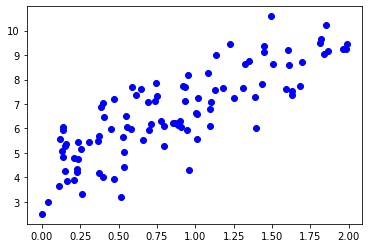

In [20]:
import matplotlib.pyplot as plt

plt.plot(X,y, 'bo')
plt.show()

# normal equation

In [21]:
X_b = np.c_[np.ones((100,1)),X] # for x0 = 1 for bias theta

# calculate theta
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # y = 4 + 3x1

array([[4.30094114],
       [2.69894961]])

In [22]:
# test the prediction

X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [23]:
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b 

array([[1., 0.],
       [1., 2.]])

In [24]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.30094114],
       [9.69884037]])

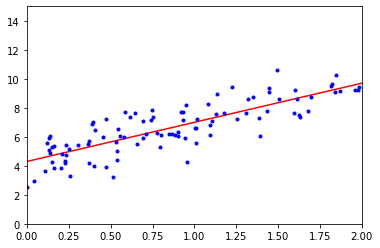

In [25]:
plt.plot(X_new, y_predict, "-r")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## linear regression using scikitLearn

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y)

lin_reg.intercept_, lin_reg.coef_ 

ValueError: illegal value in 4-th argument of internal None

In [27]:
lin_reg.predict(X_new)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [28]:
# least squares
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.30094114],
       [2.69894961]])

In [29]:
# or calculate theta manually
np.linalg.pinv(X_b).dot(y)

array([[4.30094114],
       [2.69894961]])

# gradient descent 

## batch gradient descent

In [30]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.30094114],
       [2.69894961]])

## stochastic gradient descent

#### use just one random instance to calculate gradient

In [31]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
 return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index +1]
        yi = y[random_index : random_index +1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m +i)
        theta = theta - eta * gradients
        
theta

array([[4.34749552],
       [2.67386303]])

In [32]:
# from scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000
                      , tol = 1e-3
                      , penalty = None
                      , eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [33]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.27461397]), array([2.67600191]))

## mini batch gradient descent

## polynomial Regression

##### use linear regression for none linear data

In [34]:
# if instances are not linear. 

m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1) # quadratic equation

In [35]:
# add power of features to make it curve

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-2.28644777]), array([-2.28644777,  5.22784339]))

In [36]:
# and use linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# 1.9 + 0.94x + 0.51x^2

(array([2.25760259]), array([[1.0244688 , 0.44408139]]))

## learning Curve
##### to see which model is sutable, which is overfitted and which is underfitted

In [37]:
# plot model and error by  cross validation
# measure the error by adding instances to training set

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

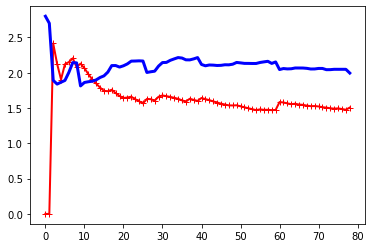

In [38]:
# measure for a linear regression over plain data
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# not improve by more training data 
# no good in validation eather

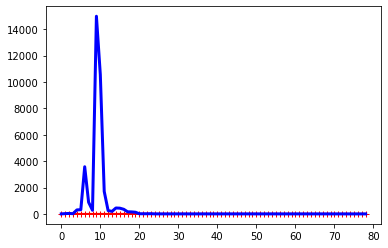

In [39]:
# measure for 10- degree polynomial

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10 , include_bias = False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# much better on training
# more training data => validation error get close to training error : happen in overfitting

### overfitting
### 1) more training data
### 2) Regularization (limit the parameters)

### polynomial --> decrease the degree
### linear model --> Ridge Regression, Lasso Regression , Elastic Net
### iterative learning --> early stopping 

## Ridge Regression

#### add alpha * thetha(s) to cost function to ensure that they dont grow

#### cost function for train. not for measuring the model performance

#### good with few features

In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")

ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])


array([[5.05344915]])

In [41]:
# stocastic with regularization 
sgd_reg = SGDRegressor(penalty="l2") # l2 shows regularization of l2 norm(Ridge)

sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])


array([5.0146402])

## Losso Regression

In [42]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)

lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([5.0069583])

In [43]:
# stocastic with regularization
sgd_reg = SGDRegressor(penalty="l1") # l1 shows regularization of l1 norm(Lossp)

sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([5.02197086])

## Elastic Net

#### mix losso and Ridge and a rate (r) to control

In [44]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(X, y)

elastic_net.predict([[1.5]])


array([5.00713111])

## early stopping

#### stop when catch a minimum validation error
##### in min-batch or stochastic should have back up and roll back when get worst

In [45]:
from sklearn.base import clone

from sklearn.preprocessing import StandardScaler

#prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90 , include_bias = False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1
                       ,tol = -np.infty
                       ,warm_start = True
                       ,penalty = None
                      ,learning_rate = "constant"
                      ,eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg .fit(X_train_poly_scaled, y_train) # continues where it left off
    
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

NameError: name 'X_train' is not defined

# Logestic Regression

#### estimate the probability , use sigmoid function --> logestic function
#### use log function of prev  -->  cost function
#### then combine them --> log loss


In [1]:
# data load

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [22]:
iris.data.shape , iris.target.shape

((150, 4), (150,))

In [23]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
iris.feature_names , iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [16]:
import numpy as np
X = iris["data"][:,3:] #petal width
y = (iris["target"] == 2).astype(np.int)




In [5]:
# logestic regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

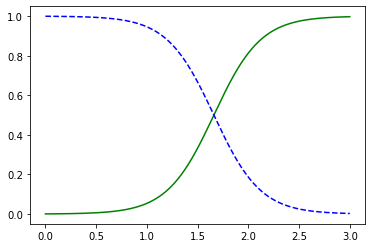

In [11]:
X_new = np.linspace(0,3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

import matplotlib.pyplot as plt
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "Not Iris virginica")

In [18]:
# decision boundary = 1.6

# probability more than it, even model is not confident about it

log_reg.predict([[1.7],[1.5]])

array([1, 0])

## regularization for logistic regression
#### l2 and l1 in scikit learn

## softmax Regression

#### for multiclass, one output

In [19]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

# multi_class
# solver

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [20]:
softmax_reg.predict([[5, 2]])


array([2])

In [21]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])